In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("../data/processed/data_final.csv")

In [22]:
X = df[["sleep_sum", "sleep_quality", "stepCount", "sportTime"]]
y = df["mean_hrv"]

In [41]:
ridge_cv = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=[0.01, 0.1, 1, 10, 100]))
])


In [43]:
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.named_steps["ridge"].alpha_)

Best alpha: 10.0


In [44]:
y_pred = ridge_cv.predict(X_test)

In [51]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
alpha = ridge_cv.named_steps["ridge"].alpha_

In [45]:
print("R²:", r2)
print("MAE:",meae)

R²: -0.011266107071612907
MAE: 5.080569388850994


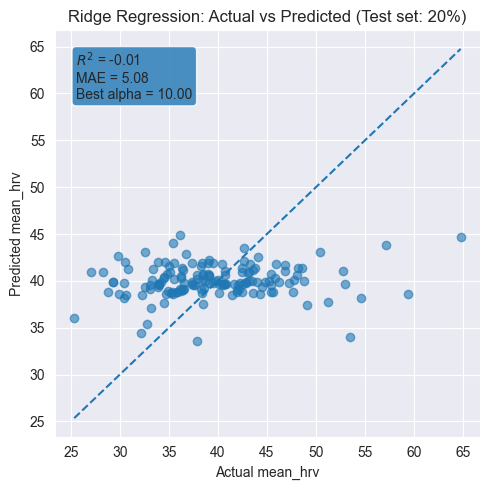

In [53]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual mean_hrv")
plt.ylabel("Predicted mean_hrv")
plt.title("Ridge Regression: Actual vs Predicted (Test set: 20%)")


plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.2f}\nMAE = {mae:.2f}\nBest alpha = {alpha:.2f}",
    transform=plt.gca().transAxes,
    verticalalignment="top",
    bbox=dict(boxstyle="round", alpha=0.8)
)

plt.tight_layout()
plt.show()